In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse,mean_absolute_error as mae,r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DATA ANALYTICS LAB/Datasets/spotify_final.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track,Year
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1.0,725.4,3.904709e+08,30716.0,196631588.0,...,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0,2024
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2.0,545.9,3.237039e+08,28113.0,174597137.0,...,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,1118279.0,1,2024
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3.0,538.4,6.013093e+08,54331.0,211607669.0,...,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,5285340.0,0,2024
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4.0,444.9,2.031281e+09,269802.0,136569078.0,...,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,11822942.0,0,2023
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5.0,423.3,1.070349e+08,7223.0,151469874.0,...,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,457017.0,1,2024


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4600 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   float64
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4600 non-null   float64
 8   Spotify Playlist Count      4600 non-null   float64
 9   Spotify Playlist Reach      4600 non-null   float64
 10  Spotify Popularity          4600 non-null   float64
 11  YouTube Views               4600 non-null   float64
 12  YouTube Likes               4600 non-null   float64
 13  TikTok Posts                4600 

In [ ]:
data=df.drop(columns=['Track','Album Name','Artist','Release Date','ISRC'],axis=1)

In [ ]:
data.head()

,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track,Year
0,1.0,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,...,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,2669262.0,0,2024
1,2.0,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,...,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,1118279.0,1,2024
2,3.0,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,...,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,5285340.0,0,2024
3,4.0,444.9,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,...,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,11822942.0,0,2023
4,5.0,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,0.000000e+00,...,12185.0,1.0,82.0,17660624.0,105.0,4493884.0,7006.0,457017.0,1,2024


In [ ]:
x=data.drop(columns=['Track Score'],axis=1)
y=data['Track Score']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
print('Mean_squared_error : ', mse(y_test, predictions))
print('Mean_absSSolute_error : ', mae(y_test, predictions))

Mean_squared_error :  540.7462029804486
Mean_absolute_error :  12.20942781343295


In [ ]:
r2_score(y_test,predictions)

0.6167879505292904

In [ ]:
y_train_pred=model.predict(x_train)

In [ ]:
print('Mean_squared_error : ', mse(y_train,y_train_pred))
print('Mean_absolute_error : ', mae(y_train,y_train_pred))
print('r2_score : ', r2_score(y_train,y_train_pred))

Mean_squared_error :  596.0866891919707
Mean_absolute_error :  12.07001395135093
r2_score :  0.6034095019230952


<ipython-input-23-f73d90a72b95>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='Track Score', ylabel='Density'>

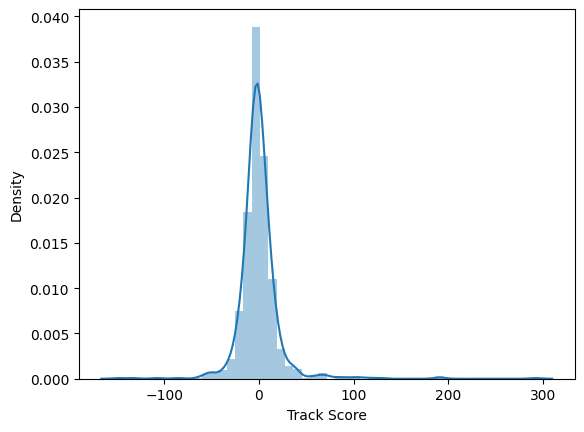

In [ ]:
sns.distplot(y_test-predictions)

<function matplotlib.pyplot.show(close=None, block=None)>

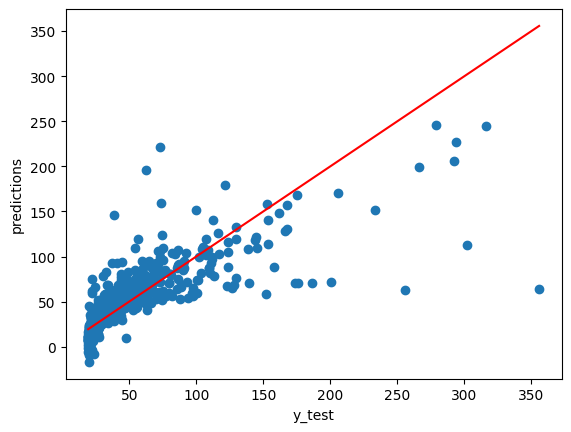

In [ ]:
plt.scatter(y_test,predictions)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.show

In [ ]:
population=data.sample(n=1000,random_state=1)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATA ANALYTICS LAB/Datasets/spotify_final.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4600 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   float64
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4600 non-null   float64
 8   Spotify Playlist Count      4600 non-null   float64
 9   Spotify Playlist Reach      4600 non-null   float64
 10  Spotify Popularity          4600 non-null   float64
 11  YouTube Views               4600 non-null   float64
 12  YouTube Likes               4600 non-null   float64
 13  TikTok Posts                4600 

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv("/content/drive/MyDrive/DATA ANALYTICS LAB/Datasets/spotify_final.csv")

X = data.drop(columns=['Explicit Track', 'Track', 'Album Name', 'Artist', 'Release Date', 'ISRC'])
y = data['Explicit Track']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cv_scores = cross_val_score(best_model, X_scaled, y, cv=5)
print(f"\nCross-Validation Accuracy: {cv_scores.mean()}")

Confusion Matrix:
[[522  53]
 [234 111]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.91      0.78       575
           1       0.68      0.32      0.44       345

    accuracy                           0.69       920
   macro avg       0.68      0.61      0.61       920
weighted avg       0.69      0.69      0.65       920


Cross-Validation Accuracy: 0.6736956521739131


In [ ]:
len(df['Artist'].value_counts())

2000

In [ ]:
y_pred = best_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[522  53]
 [234 111]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.91      0.78       575
           1       0.68      0.32      0.44       345

    accuracy                           0.69       920
   macro avg       0.68      0.61      0.61       920
weighted avg       0.69      0.69      0.65       920

